# Exploratory Data Analysis of Data Science Jobs Dataset

This notebook performs data cleaning, univariate, bivariate, and multivariate analysis on the `ds_jobs.csv` dataset, using visualizations to extract key insights.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization styles
sns.set_style('whitegrid')
%matplotlib inline

## Load the Dataset
Load the `ds_jobs.csv` file and display the first few rows to understand the structure of the data.

In [2]:
# Load the Dataset
df = pd.read_csv('../data/ds_jobs.csv')
df.head()

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,325236.0,/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,539530.5,/yr (est.),10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,539530.5,/yr (est.),10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7
3,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,539530.5,/yr (est.),10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7
4,Beinex,Trainee in Data Science,3.9,Highlights\nExperience\nFreshers\nJoining Date...,Cochin,280977.0,/yr (est.),201 to 500 Employees,2017,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,3.8,3.6,3.9,3.9,3.5


## Initial Data Exploration
Check the shape, data types, missing values, and basic statistics of the dataset.

In [5]:
# Dataset shape
print('Shape:', df.shape)

# Data types and non-null counts
df.info()

Shape: (561, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   company                      561 non-null    object 
 1   job_title                    561 non-null    object 
 2   company_rating               561 non-null    float64
 3   job_description              561 non-null    object 
 4   location                     561 non-null    object 
 5   salary_avg_estimate          561 non-null    float64
 6   salary_estimate_payperiod    561 non-null    object 
 7   company_size                 561 non-null    object 
 8   company_founded              561 non-null    int64  
 9   employment_type              561 non-null    object 
 10  industry                     561 non-null    object 
 11  sector                       561 non-null    object 
 12  revenue                      561 non-null    object 
 13  car

In [4]:
# Check for missing values
print('\nMissing values per column:')
print(df.isnull().sum())



Missing values per column:
company                        0
job_title                      0
company_rating                 0
job_description                0
location                       0
salary_avg_estimate            0
salary_estimate_payperiod      0
company_size                   0
company_founded                0
employment_type                0
industry                       0
sector                         0
revenue                        0
career_opportunities_rating    0
comp_and_benefits_rating       0
culture_and_values_rating      0
senior_management_rating       0
work_life_balance_rating       0
dtype: int64


In [6]:
# Basic statistics for numerical columns
df.describe()

,company_rating,salary_avg_estimate,company_founded,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
count,561.00000,5.610000e+02,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3.95508,6.045194e+05,1964.900178,3.835116,3.693048,3.918360,3.648307,3.811586
std,0.36972,3.867464e+05,70.270046,0.429988,0.426579,0.441023,0.482221,0.444399
min,2.30000,2.000000e+02,1668.000000,2.000000,1.500000,1.300000,2.000000,1.800000
25%,3.80000,4.824420e+05,1945.000000,3.600000,3.400000,3.700000,3.300000,3.600000
50%,4.00000,5.395305e+05,1997.000000,3.800000,3.700000,3.900000,3.600000,3.800000
75%,4.10000,6.500000e+05,2012.000000,4.100000,3.900000,4.200000,3.900000,4.100000
max,5.00000,5.200000e+06,2022.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Data Cleaning
Handle missing values, remove duplicates, and perform necessary data type conversions or corrections.

In [7]:
# Remove duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 4 duplicate rows.


In [8]:
# Handle missing values (example: fill with median or mode, or drop if too many missing)
missing = df.isnull().sum()
print('Missing values after duplicate removal:')
print(missing[missing > 0])

Missing values after duplicate removal:
Series([], dtype: int64)


In [9]:
# Example: Fill missing numerical columns with median, categorical with mode
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [10]:
# Convert data types if needed (e.g., company_founded to int)
df['company_founded'] = pd.to_numeric(df['company_founded'], errors='coerce').astype('Int64')
df['salary_avg_estimate'] = pd.to_numeric(df['salary_avg_estimate'], errors='coerce')

In [11]:
# Check again for missing values
df.isnull().sum()

company                        0
job_title                      0
company_rating                 0
job_description                0
location                       0
salary_avg_estimate            0
salary_estimate_payperiod      0
company_size                   0
company_founded                0
employment_type                0
industry                       0
sector                         0
revenue                        0
career_opportunities_rating    0
comp_and_benefits_rating       0
culture_and_values_rating      0
senior_management_rating       0
work_life_balance_rating       0
dtype: int64

## Univariate Analysis with Visualizations
Visualize distributions of individual columns such as salary, company_rating, and job_title using histograms, boxplots, and countplots.

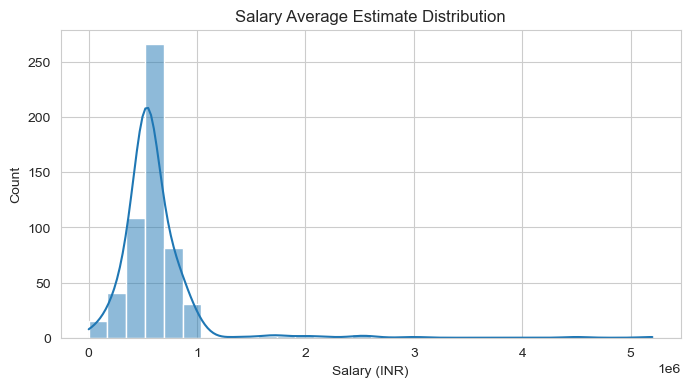

In [13]:
# Salary distribution
plt.figure(figsize=(8,4))
sns.histplot(df['salary_avg_estimate'], kde=True, bins=30)
plt.title('Salary Average Estimate Distribution')
plt.xlabel('Salary (INR)')
plt.show()

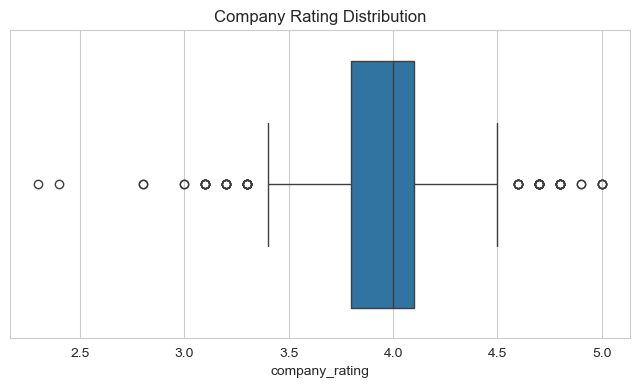

In [14]:
# Company rating distribution
plt.figure(figsize=(8,4))
sns.boxplot(x=df['company_rating'])
plt.title('Company Rating Distribution')
plt.show()

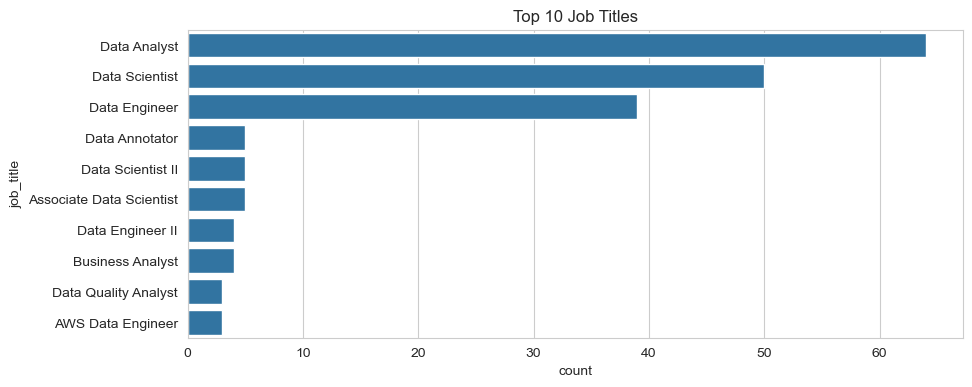

In [15]:
# Top 10 job titles
plt.figure(figsize=(10,4))
sns.countplot(y=df['job_title'], order=df['job_title'].value_counts().head(10).index)
plt.title('Top 10 Job Titles')
plt.show()

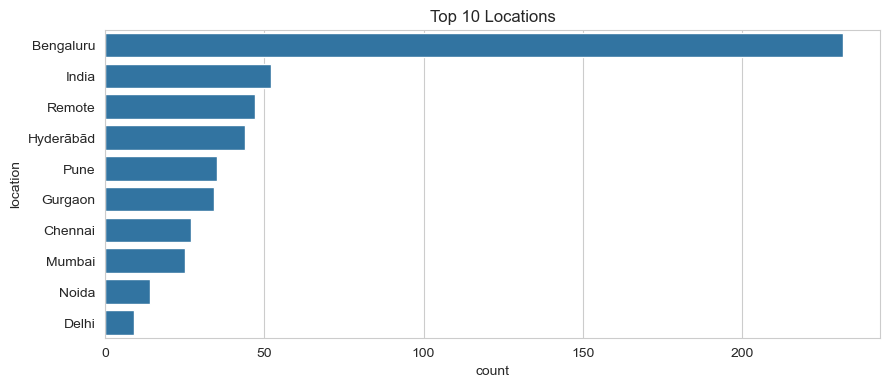

In [16]:
# Top 10 locations
plt.figure(figsize=(10,4))
sns.countplot(y=df['location'], order=df['location'].value_counts().head(10).index)
plt.title('Top 10 Locations')
plt.show()

## Bivariate Analysis with Visualizations
Explore relationships between two variables, such as salary vs. company_rating and job_title vs. location, using scatter plots, bar plots, and box plots.

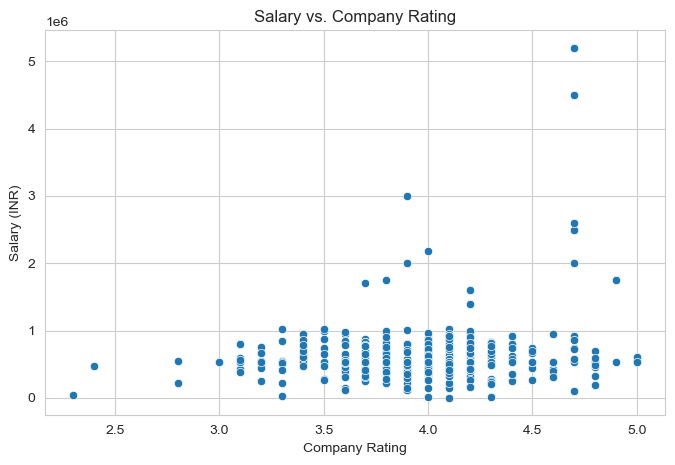

In [17]:
# Salary vs. Company Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='company_rating', y='salary_avg_estimate', data=df)
plt.title('Salary vs. Company Rating')
plt.xlabel('Company Rating')
plt.ylabel('Salary (INR)')
plt.show()

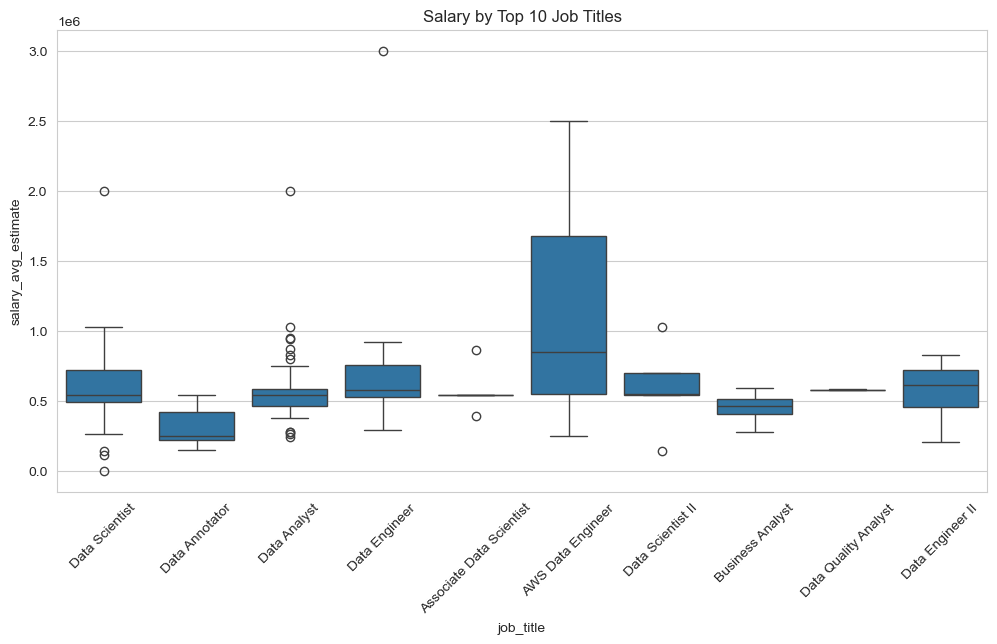

In [18]:
# Salary by Job Title (Top 10)
top_jobs = df['job_title'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='job_title', y='salary_avg_estimate', data=df[df['job_title'].isin(top_jobs)])
plt.title('Salary by Top 10 Job Titles')
plt.xticks(rotation=45)
plt.show()

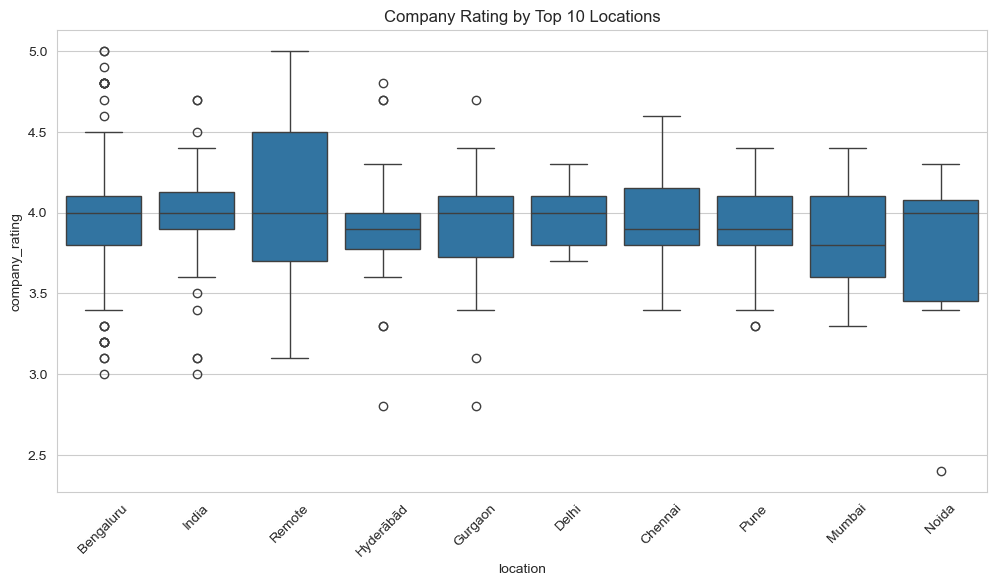

In [19]:
# Company Rating by Location (Top 10)
top_locs = df['location'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='location', y='company_rating', data=df[df['location'].isin(top_locs)])
plt.title('Company Rating by Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

## Multivariate Analysis with Visualizations
Analyze interactions among three or more variables, such as salary by job_title and location, or company_rating by industry and sector, using heatmaps, pairplots, or grouped bar plots.

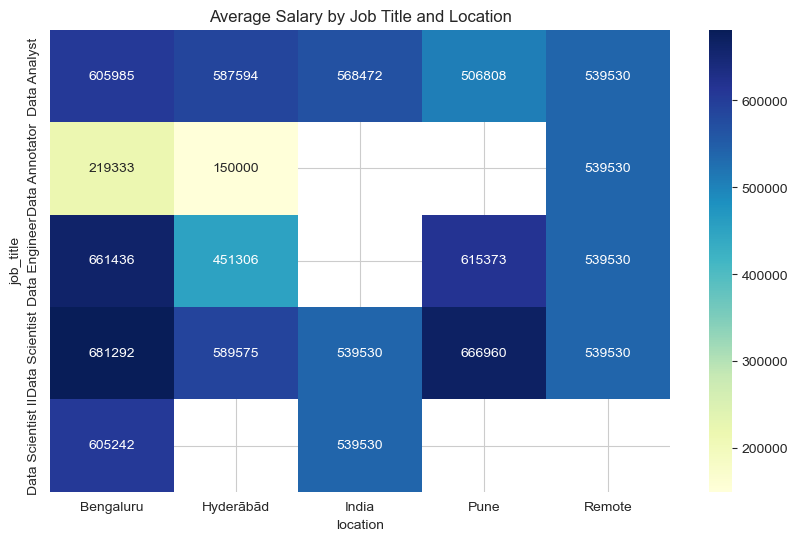

In [20]:
# Salary by Job Title and Location (Top 5 of each)
top_jobs = df['job_title'].value_counts().head(5).index
top_locs = df['location'].value_counts().head(5).index
pivot = df[df['job_title'].isin(top_jobs) & df['location'].isin(top_locs)].pivot_table(
    index='job_title', columns='location', values='salary_avg_estimate', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Salary by Job Title and Location')
plt.show()

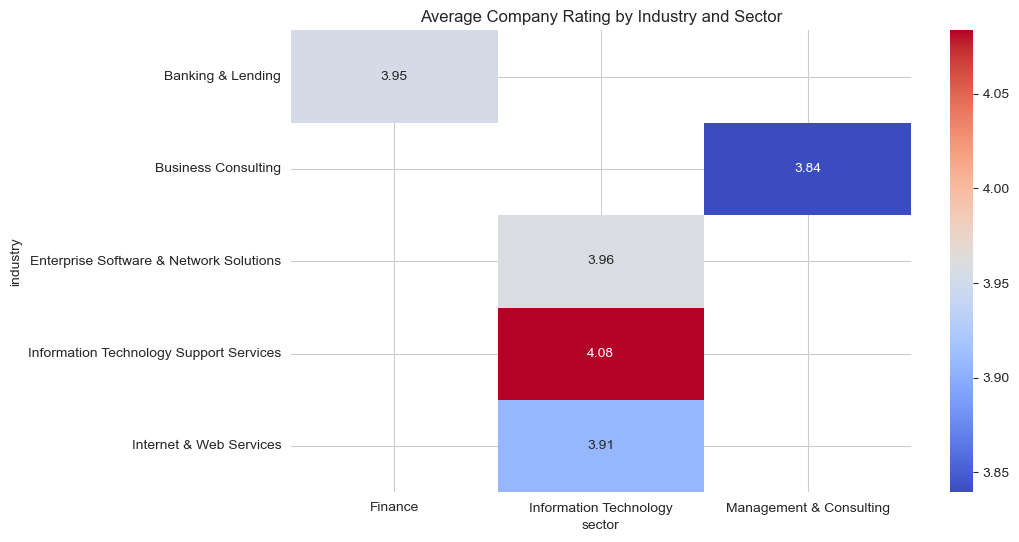

In [21]:
# Company Rating by Industry and Sector (Top 5 of each)
top_industries = df['industry'].value_counts().head(5).index
top_sectors = df['sector'].value_counts().head(5).index
pivot2 = df[df['industry'].isin(top_industries) & df['sector'].isin(top_sectors)].pivot_table(
    index='industry', columns='sector', values='company_rating', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot2, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Average Company Rating by Industry and Sector')
plt.show()

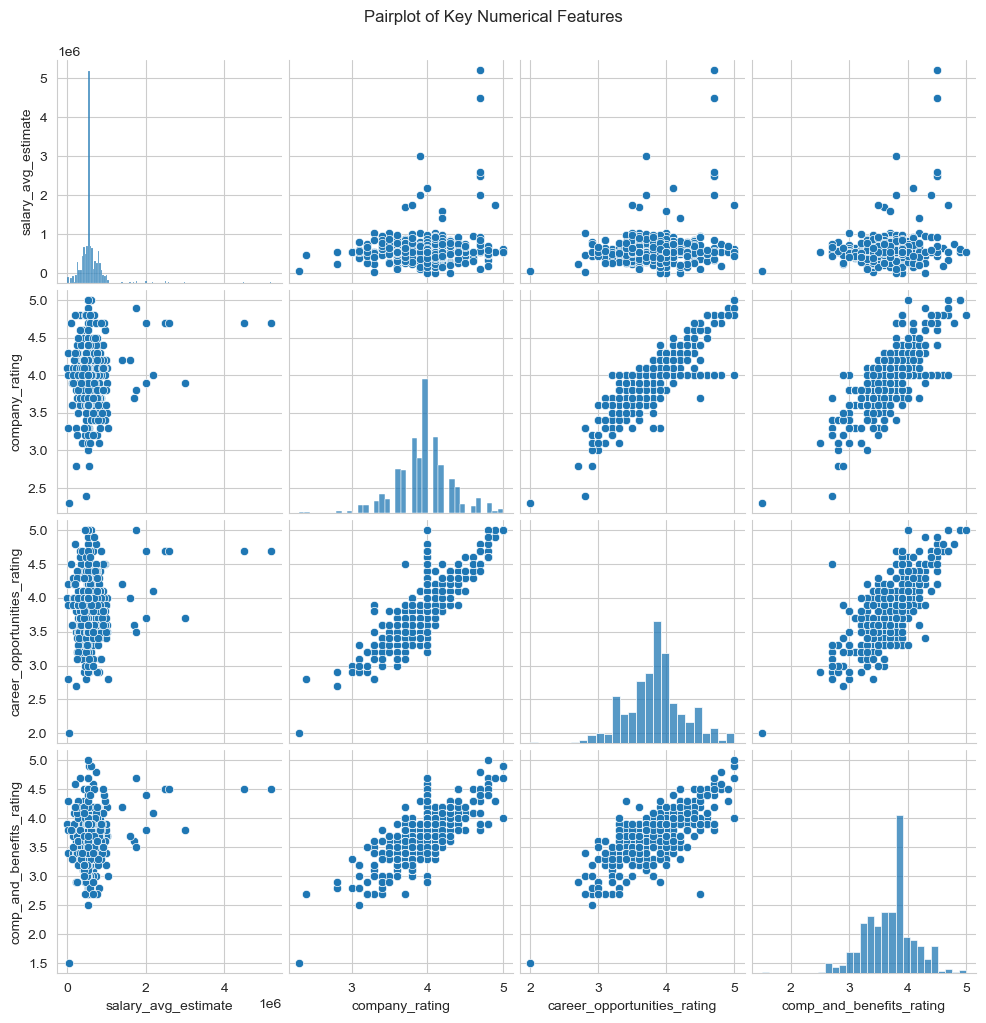

In [22]:
# Pairplot for selected numerical columns
sns.pairplot(df[['salary_avg_estimate', 'company_rating', 'career_opportunities_rating', 'comp_and_benefits_rating']])
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()

## Summary of Key Insights
List and align all the main insights discovered from the analyses and visualizations.

### Key Insights from the Data Science Jobs Dataset

- The dataset covers a wide range of companies, job titles, and locations, with Bengaluru being the most frequent location.
- Salary estimates vary significantly by job title and location, with some roles and cities offering much higher average salaries.
- Company ratings are generally high, but there is variation across industries and sectors.
- Top job titles include Data Scientist, Data Analyst, and related roles, with a concentration in large tech and finance companies.
- There are positive correlations between salary, company rating, and other company-related ratings (e.g., career opportunities, benefits).
- Multivariate analysis reveals that certain job titles in specific locations or industries command higher salaries and better ratings.
- The data is relatively clean after handling missing values and duplicates, making it suitable for further modeling or business analysis.

These insights can help job seekers, recruiters, and companies understand the landscape of data science jobs in India.